In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
Consumer_Key = "CGxhnEQwmi5QJl69NiqmkhEdw"
Consumer_Secret_Key = "WubfToWPZhwxEHlmRwaPUFS8cZpwHDsD1jNxdg8v1L4ejIefbW"
Access_Token = "1334735354927071232-IqStzBg2yJSPripFOKvggD1cb0mOTE"
Access_Token_Secret = "6fm8Fm2ZcUAxJq1yrMEkNdv95no6mkRoCS6Xk80ysPdFs"

In [5]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [9]:
posts = api.user_timeline(screen_name="lazadaidcare", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @AndriSamsudi Demi keamanan data Kak Andri, boleh infoin nomor pesanan dan nama pemesan melalui DM? nanti aku bantu cek yah. -Juan

2) @MediaKonsumenID Hai Kak, apabila kamu memiliki pertanyaan mengenai pemesanan di Lazada bisa langsung ke akun DM Twitter @LazadaIDCare ya agar nanti dapat dibantu lebih lanjut.

3) @vespajadoel Hai Lazadian, sudah direspon ya DMnya. Yuk cek lagi ya. -Claudia

4) @Scytha11 Hai Kak Scytha, kami turut menyesal atas kendala yang terjadi. Demi keamanan data kamu bisa menghubungi kami melalui DM Twitter @LazadaIDCare agar dapat dibantu lebih lanjut. -Kia

5) @abc_tools_hardw Kami turut menyesal atas perihal tersebut Kak:( Mohon kesebarannya ya Kak dan cek secara berkala pada akun seller ya. -Danish



In [10]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"@AndriSamsudi Demi keamanan data Kak Andri, bo..."
1,"@MediaKonsumenID Hai Kak, apabila kamu memilik..."
2,"@vespajadoel Hai Lazadian, sudah direspon ya D..."
3,"@Scytha11 Hai Kak Scytha, kami turut menyesal ..."
4,@abc_tools_hardw Kami turut menyesal atas peri...


In [12]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Demi keamanan data Kak Andri, boleh infoin no..."
1,"Hai Kak, apabila kamu memiliki pertanyaan men..."
2,"Hai Lazadian, sudah direspon ya DMnya. Yuk ce..."
3,"11 Hai Kak Scytha, kami turut menyesal atas ke..."
4,_tools_hardw Kami turut menyesal atas perihal ...
...,...
195,Permasalahan kamu udah aku respon di Dm ya. -Vio
196,"Hai Lazadian, DM udah di respon yah. Yuk cek ..."
197,"_bjm Hi Kak Arold, untuk perihal tersebut udah..."
198,"64 Dilanjutkan sama aku ya Kak Sujana, aku cek..."


In [13]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Demi keamanan data Kak Andri, boleh infoin no...",0.0,0.00
1,"Hai Kak, apabila kamu memiliki pertanyaan men...",0.0,0.00
2,"Hai Lazadian, sudah direspon ya DMnya. Yuk ce...",0.0,0.00
3,"11 Hai Kak Scytha, kami turut menyesal atas ke...",0.0,0.00
4,_tools_hardw Kami turut menyesal atas perihal ...,1.0,-0.75
...,...,...,...
195,Permasalahan kamu udah aku respon di Dm ya. -Vio,0.0,0.00
196,"Hai Lazadian, DM udah di respon yah. Yuk cek ...",1.0,0.50
197,"_bjm Hi Kak Arold, untuk perihal tersebut udah...",0.0,0.00
198,"64 Dilanjutkan sama aku ya Kak Sujana, aku cek...",0.0,0.00


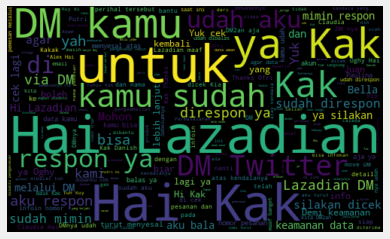

In [14]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Demi keamanan data Kak Andri, boleh infoin no...",0.0,0.00,Neutral
1,"Hai Kak, apabila kamu memiliki pertanyaan men...",0.0,0.00,Neutral
2,"Hai Lazadian, sudah direspon ya DMnya. Yuk ce...",0.0,0.00,Neutral
3,"11 Hai Kak Scytha, kami turut menyesal atas ke...",0.0,0.00,Neutral
4,_tools_hardw Kami turut menyesal atas perihal ...,1.0,-0.75,Negative
...,...,...,...,...
195,Permasalahan kamu udah aku respon di Dm ya. -Vio,0.0,0.00,Neutral
196,"Hai Lazadian, DM udah di respon yah. Yuk cek ...",1.0,0.50,Positive
197,"_bjm Hi Kak Arold, untuk perihal tersebut udah...",0.0,0.00,Neutral
198,"64 Dilanjutkan sama aku ya Kak Sujana, aku cek...",0.0,0.00,Neutral


In [16]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) _tools_hardw Kami turut menyesal atas perihal tersebut Kak:( Mohon kesebarannya ya Kak dan cek secara berkala pada akun seller ya. -Danish

2) 12 Hai Lazadian, kemi turut menyesal atas perihal tersebut Kak:( Untuk keamanan datanya silahkan hubungi kami lewat DM Twitter aja ya Kak, kami tunggu Kak. -Danish

3) _tools_hardw Baik Kak, untuk akun seller saat ini sedang ada peningkatan sistem ya Kak:( Jadi mohon kesediaannya menunggu dan cek secara berkala ya Kak. -Danish

4) _tools_hardw Hai Lazadian, maafin atas ketidaknyamanannya ya Kak:( Demi keamanan data silagkan hubungi kami lewat DM Twitter ya Kak, kami tunggu ya. -Danish

5) 116 Hai Lazadian, maaf banget ya Kak :(. Mohon diinfokan nomor pesanan yang pengembalian dananya kurang. -Vio

6) 2 Hai Lazadian, kami turut menyesal atas kendala yang terjadi Kak:( Untuk keamanan datanya silahkan hubungi kami lewat DM Twitter aja ya Kak, kami tunggu ya. -Danish

7)  Hai Lazadian, maaf yah jadi engga nyaman kamunya

In [17]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1)  Udah aku respon ya Kak Surdin, kita lanjut di DM saja ya. :) -Adam

2)  Hai Lazadian, DM kamu sudah mimin respon ya. Kita lanjut di DM ya Kak. :) -Adam

3) 116 Untuk nomor pesanan ada 15 digit Kak, bisa di info melalui DM Twitter  :) -Kia

4) 81 Hai Kak Rifaldi, saat ini sistem kami dalam pemeliharaan ya. Silakan dicoba kembali secara berkala dan semoga berjalan dengan lancar. :) -Adam

5) 8 Permasalahan kamu udah aku respon di Dm ya :). -Vio

6) _ipoelz Yuhuu Kak, DM nya udah dibalas tuh 😊 Kuy di cek lagi ya Kak. Thanks -Ofri

7)  Yuhuu Kak, DM nya udah dibalas tuh 😊 Kuy di cek lagi ya Kak. Thanks -Ofri

8) _ipoelz Hi Lazadian, maaf banget perihal tersebut move DM yuk dan infoin detail transaksi tsb ya Kak. Thanks -Ofri

9) _actigo Makasih kembali Kak Irnazia untuk konfirmasinya, kamu juga bisa hubungi Tim Customer Care kami via layanan live chat di link  yang siap bantu kamu selama 24 jam. -Juan

10)  Makasih kembali Kak Syahindra, kamu juga bisa hubung

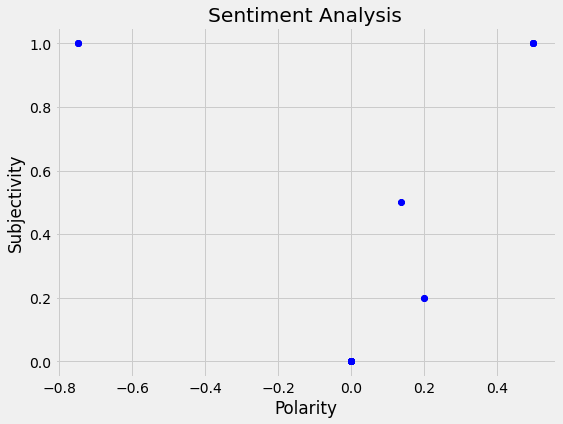

In [19]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [20]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

10.0

In [21]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     172
Positive     20
Negative      8
Name: Analysis, dtype: int64

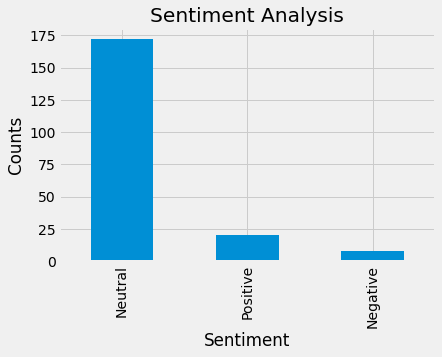

In [22]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

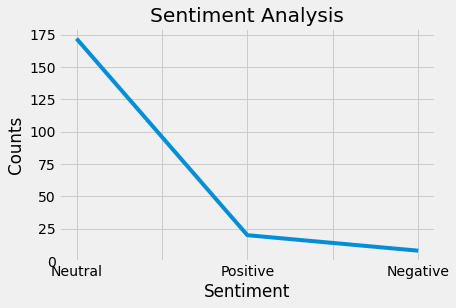

In [23]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()